## Import Library

In [1]:
import pandas as pd # For manipulate and analyze data I/O dataframe
import numpy as np # For numeric and computation operation
import matplotlib.pyplot as plt # For visualization of graph and plot
import seaborn as sns # Built on plt, provide more satisfying visualization
import warnings # Handle the showed warning
warnings.filterwarnings("ignore")

## Install Kaggle

In [2]:
# %pip install kaggle

In [3]:
# from kaggle.api.kaggle_api_extended import KaggleApi

# api = KaggleApi()
# api.authenticate()
# api.dataset_download_files('aadarshvelu/liver-cirrhosis-stage-classification', unzip=True)

## Pre-processing

In [4]:
df = pd.read_csv('liver_cirrhosis.csv')
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [6]:
df.nunique()

N_Days           549
Status             3
Drug               2
Age              510
Sex                2
Ascites            2
Hepatomegaly       2
Spiders            2
Edema              3
Bilirubin        113
Cholesterol      220
Albumin          179
Copper           197
Alk_Phos         336
SGOT             240
Tryglicerides    157
Platelets        295
Prothrombin       51
Stage              3
dtype: int64

In [7]:
columns = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

value_counts = {columns: df[columns].value_counts() for columns in columns}
value_counts

{'Status': Status
 C     13516
 D      9456
 CL     2028
 Name: count, dtype: int64,
 'Drug': Drug
 Placebo            15827
 D-penicillamine     9173
 Name: count, dtype: int64,
 'Sex': Sex
 F    22137
 M     2863
 Name: count, dtype: int64,
 'Ascites': Ascites
 N    16798
 Y     8202
 Name: count, dtype: int64,
 'Hepatomegaly': Hepatomegaly
 N    15243
 Y     9757
 Name: count, dtype: int64,
 'Spiders': Spiders
 N    13614
 Y    11386
 Name: count, dtype: int64,
 'Edema': Edema
 N    20220
 S     3698
 Y     1082
 Name: count, dtype: int64}

In [8]:
df['Status'] = df['Status'].map({'C': 0, 'D': 1, 'CL': 2})
df['Drug'] = df['Drug'].map({'Placebo': 0, 'D-penicillamine': 1})
df['Sex'] = df['Sex'].map({'F': 0, 'M': 1})
df['Ascites'] = df['Ascites'].map({'N': 0, 'Y': 1})
df['Hepatomegaly'] = df['Hepatomegaly'].map({'N': 0, 'Y': 1})
df['Spiders'] = df['Spiders'].map({'N': 0, 'Y': 1})
df['Edema'] = df['Edema'].map({'N': 0, 'Y': 1})
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,0,0,18499,0,0,1,0,0.0,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,0,0,19724,1,1,0,1,0.0,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,0,0,11839,0,0,0,0,0.0,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,1,0,16467,0,0,0,0,0.0,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,1,0,21699,0,0,1,0,0.0,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  int64  
 2   Drug           25000 non-null  int64  
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  int64  
 5   Ascites        25000 non-null  int64  
 6   Hepatomegaly   25000 non-null  int64  
 7   Spiders        25000 non-null  int64  
 8   Edema          21302 non-null  float64
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [10]:
df.drop('N_Days', axis=1, inplace=True)
df.head()

,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,0,18499,0,0,1,0,0.0,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,0,0,19724,1,1,0,1,0.0,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,0,0,11839,0,0,0,0,0.0,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,1,0,16467,0,0,0,0,0.0,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,1,0,21699,0,0,1,0,0.0,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [11]:
columns_to_handle = ['Age', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

mean_values = df[columns_to_handle].mean()
q1_values = df[columns_to_handle].quantile(0.25)
q3_values = df[columns_to_handle].quantile(0.75)

for column in columns_to_handle:
    mask_above_q3 = df[column] > q3_values[column]
    df.loc[mask_above_q3, column] = np.random.uniform(mean_values[column], q3_values[column], np.sum(mask_above_q3))

for column in columns_to_handle:
    mask_below_q1 = df[column] < q1_values[column]
    df.loc[mask_below_q1, column] = np.random.uniform(q1_values[column], mean_values[column], np.sum(mask_below_q1))

In [12]:
df.head()

,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,0,18499.000000,0,0,1,0,0.0,0.5,298.487790,3.734090,106.075017,1630.047235,109.313689,98.698234,256.000000,10.022714,1
1,0,0,19724.000000,1,1,0,1,0.0,0.5,302.362979,3.500141,55.363423,1986.680331,107.076826,115.657281,220.000000,10.800000,2
2,0,0,18036.481884,0,0,0,0,0.0,0.5,320.000000,3.540000,91.847678,1243.000000,122.450000,101.952941,225.000000,10.000000,2
3,1,0,16467.000000,0,0,0,0,0.0,0.7,320.590825,3.740000,77.016964,1508.055495,103.820851,107.142954,209.028773,10.200000,2
4,1,0,20853.509339,0,0,1,0,0.0,1.9,369.778712,3.540000,74.000000,1052.000000,108.500000,109.000000,248.469704,10.995666,1


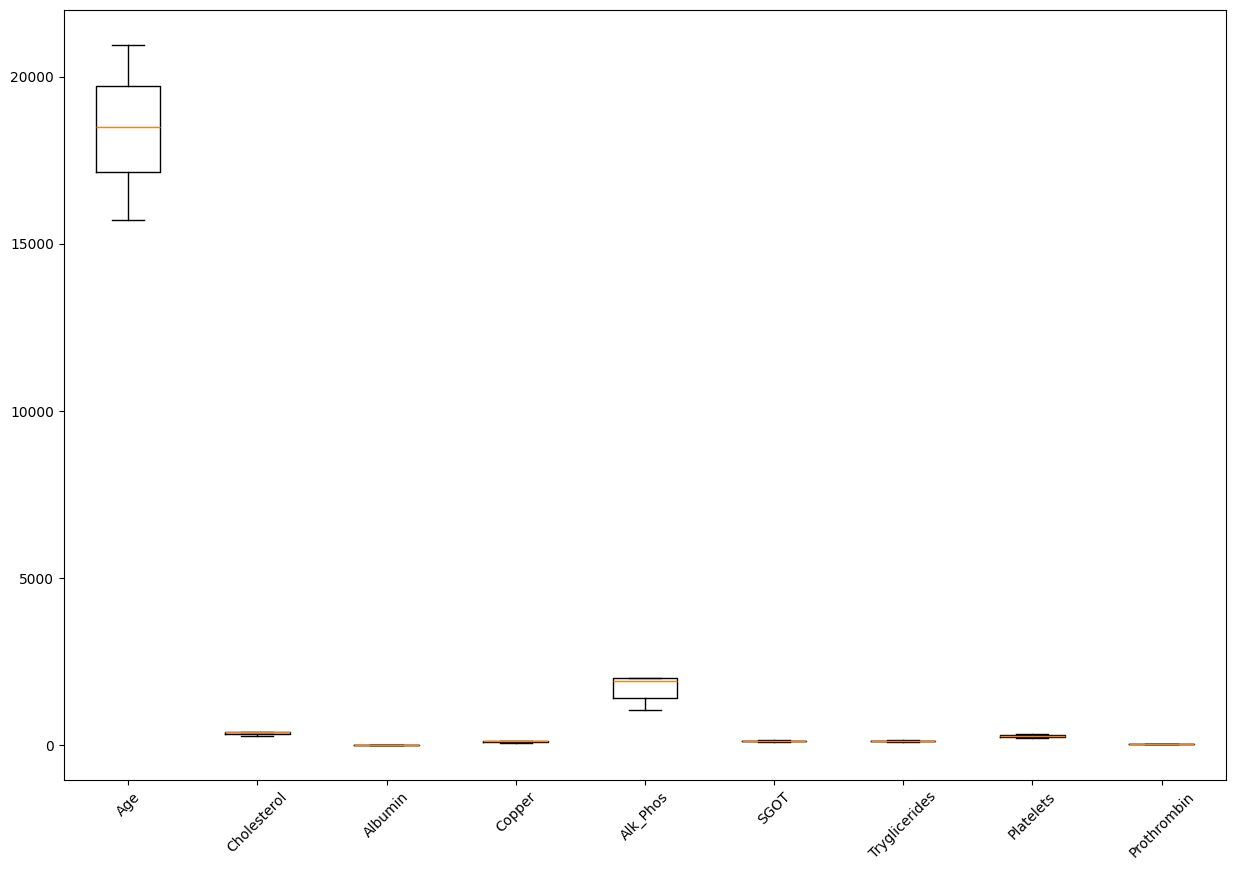

In [13]:
columns_to_plot = ['Age', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

plt.figure(figsize=(15,10))
plt.boxplot(df[columns_to_plot].values, labels=columns_to_plot, showfliers=True)
plt.xticks(rotation=45)
plt.show()

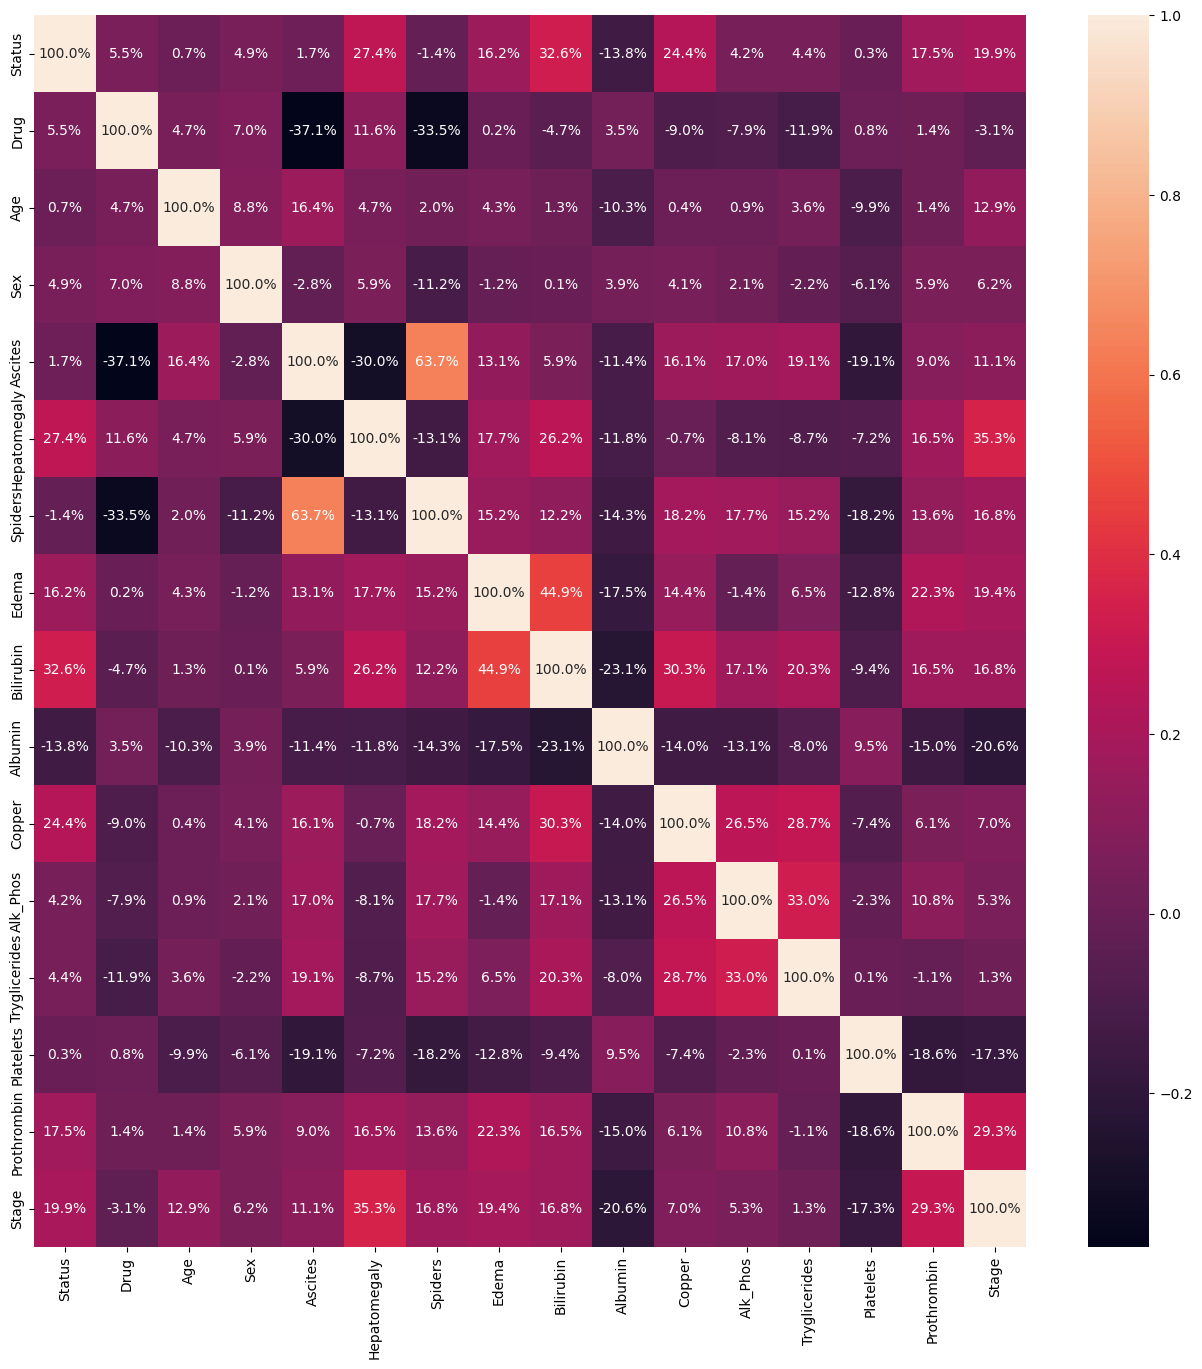

In [14]:
corr = df.corr()
plt.figure(figsize=(16, 16))
threshold = 0.1
columns_to_drop = []
for column in corr.columns:
    if abs(corr[column].loc[corr.columns != column].min()) < threshold:
        columns_to_drop.append(column)

new_df = df.copy()
new_df.drop(columns=columns_to_drop, inplace=True)
correlation = new_df.corr()
sns.heatmap(correlation, annot=True, fmt=".1%")

plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(new_df.drop('Stage', axis=1))
scaled_features = scaler.transform(new_df.drop('Stage', axis=1))
df_feat = pd.DataFrame(scaled_features, columns=new_df.columns[:-1])
df_feat.head()

,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Copper,Alk_Phos,Tryglicerides,Platelets,Prothrombin
0,-0.843470,-0.761301,0.044655,-0.359626,-0.698765,1.249905,-0.914519,-0.231325,-0.616613,1.753683,1.070611,-0.236120,-1.869514,0.149650,-1.650373
1,-0.843470,-0.761301,0.863320,2.780665,1.431096,-0.800061,1.093471,-0.231325,-0.616613,-0.051850,-2.036138,0.839449,-0.224356,-0.908375,0.571396
2,-0.843470,-0.761301,-0.264445,-0.359626,-0.698765,-0.800061,-0.914519,-0.231325,-0.616613,0.255768,0.199000,-1.403414,-1.553782,-0.761427,-1.715299
3,0.717124,-0.761301,-1.313326,-0.359626,-0.698765,-0.800061,-0.914519,-0.231325,-0.574127,1.799293,-0.709575,-0.604034,-1.050311,-1.230815,-1.143625
4,0.717124,-0.761301,1.618169,-0.359626,-0.698765,1.249905,-0.914519,-0.231325,-0.319209,0.255768,-0.894404,-1.979451,-0.870163,-0.071663,1.130682


In [22]:
y_column = new_df['Stage']
y_column.head()

0    1
1    2
2    2
3    2
4    1
Name: Stage, dtype: int64

In [23]:
df_final = pd.concat([df_feat, y_column], axis=1)
df_final.head()

,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Copper,Alk_Phos,Tryglicerides,Platelets,Prothrombin,Stage
0,-0.843470,-0.761301,0.044655,-0.359626,-0.698765,1.249905,-0.914519,-0.231325,-0.616613,1.753683,1.070611,-0.236120,-1.869514,0.149650,-1.650373,1
1,-0.843470,-0.761301,0.863320,2.780665,1.431096,-0.800061,1.093471,-0.231325,-0.616613,-0.051850,-2.036138,0.839449,-0.224356,-0.908375,0.571396,2
2,-0.843470,-0.761301,-0.264445,-0.359626,-0.698765,-0.800061,-0.914519,-0.231325,-0.616613,0.255768,0.199000,-1.403414,-1.553782,-0.761427,-1.715299,2
3,0.717124,-0.761301,-1.313326,-0.359626,-0.698765,-0.800061,-0.914519,-0.231325,-0.574127,1.799293,-0.709575,-0.604034,-1.050311,-1.230815,-1.143625,2
4,0.717124,-0.761301,1.618169,-0.359626,-0.698765,1.249905,-0.914519,-0.231325,-0.319209,0.255768,-0.894404,-1.979451,-0.870163,-0.071663,1.130682,1


In [27]:
df_final['Edema'].fillna(method='ffill', inplace=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Status         25000 non-null  float64
 1   Drug           25000 non-null  float64
 2   Age            25000 non-null  float64
 3   Sex            25000 non-null  float64
 4   Ascites        25000 non-null  float64
 5   Hepatomegaly   25000 non-null  float64
 6   Spiders        25000 non-null  float64
 7   Edema          25000 non-null  float64
 8   Bilirubin      25000 non-null  float64
 9   Albumin        25000 non-null  float64
 10  Copper         25000 non-null  float64
 11  Alk_Phos       25000 non-null  float64
 12  Tryglicerides  25000 non-null  float64
 13  Platelets      25000 non-null  float64
 14  Prothrombin    25000 non-null  float64
 15  Stage          25000 non-null  int64  
dtypes: float64(15), int64(1)
memory usage: 3.1 MB


## Split Dataset

In [28]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_final, test_size=0.2, random_state=42)

train_df.shape, test_df.shape

((20000, 16), (5000, 16))

## Export Dataset

In [29]:
train_df.to_csv('data_train.csv', index=False)
test_df.to_csv('data_test.csv', index=False)